# Varying inner dark matter and stellar slope together
We explore varying the inner dark matter slope (from core to cusp) in tandem with the stellar slope.

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
from orbit import *

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
vmax_sawala,sig_vmax_sawala = 17.6, 3.2
c=20.
Delta=101.1

def slos_r(r,vmax,c=c,Delta=Delta):
    rsdm = nbody_tools.rs_Vmax(vmax,c,Delta=Delta)
    return vmax*np.sqrt(1.85)*np.sqrt(rsdm/r*(np.log(1.+r/rsdm)-r/(rsdm+r)))

def slos_Rh(Rh,vmax,c=c,Delta=Delta):
    return slos_r(4.*Rh/3.,vmax,c=c,Delta=Delta)

In [10]:
def plot_slos_Minit(slos_fld='sig_proj',scut=20.):
    pmmag = 0.1
    sp = 1.
    slist=[0.1,0.5,0.7,1.]
    for i,s in enumerate(slist):
        round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_SP_%02d_slope_%02d_PM_%i_ca_10_properties.csv'\
                     %(int(sp*10.),int(s*10.),int(pmmag*100.))
        if not os.path.isfile(round_fl):
            continue
        data = pd.read_csv(round_fl)
        if slos_fld not in data.columns:
            continue
        data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
#         fltr = (data.m_half>0.01)&(data.s>20.)
        
        fltr = np.argwhere(data.m_half<1e-3)
        if len(fltr)>0:
            data = data[data.index<fltr[0][0]]
        
        plt.plot(data['m_half'],
                 data[slos_fld]/data[slos_fld][0],
                 '.',
                 color=sns.color_palette()[i],label='%0.2f'%pmmag,
                alpha=0.6)
    plt.xlim(0.01,1.3)
    plt.ylim(0.,1.2)
    xx = np.logspace(-2.,0.)
    plt.plot(xx,penarrubia_tracks_Mh(xx)[0],color='k')
    plt.ylabel('$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
    plt.xlabel('$M_\mathrm{h}/M_\mathrm{h,0}$')
    plt.semilogx()

def plot_rh_Minit(slos_fld='r_half',scut=20.):
    pmmag = 0.1
    sp = 1.
    slist=[0.1,0.5,0.7,1.]
    for i,s in enumerate(slist):
        round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_SP_%02d_slope_%02d_PM_%i_ca_10_properties.csv'\
                     %(int(sp*10.),int(s*10.),int(pmmag*100.))
        if not os.path.isfile(round_fl):
            continue
        data = pd.read_csv(round_fl)
        data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
        
        fltr = np.argwhere(data.m_half<1e-3)
        if len(fltr)>0:
            data = data[data.index<fltr[0][0]]
            
        plt.plot(data['m_half'],
                 data[slos_fld]/data[slos_fld][0],
                 '.',
                 color=sns.color_palette()[i],label='%0.2f'%pmmag,
                alpha=0.6)            
    plt.xlim(0.007,1.2)
    plt.ylim(0.,1.4)
    xx = np.logspace(-2.,0.)
    plt.plot(xx,penarrubia_tracks_Mh(xx)[1],color='k')
    l,=plt.plot(xx,penarrubia_tracks_Mh_adjusted(xx)[1],color='k',ls='dashed')
    l.set_dashes((4,1))
    plt.ylabel('$R_\mathrm{h}/R_\mathrm{h,0}$')
    plt.xlabel('$M_\mathrm{h}/M_\mathrm{h,0}$')
    plt.semilogx()

In [14]:
def plot_slos_rh(slos_fld='sig_proj'):
    pmmag = 0.1
    sp = 1.
    slist=[0.1,0.5,0.7,1.]
    for i,s in enumerate(slist):
        round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_SP_%02d_slope_%02d_PM_%i_ca_10_properties.csv'\
                     %(int(sp*10.),int(s*10.),int(pmmag*100.))
        if not os.path.isfile(round_fl):
            continue
        data = pd.read_csv(round_fl)
        if slos_fld not in data.columns:
            print 'X'
            continue
        data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
        fltr = (data.m_half>0.01)&(data.s>20.)
                
        fltr = np.argwhere(data.m_half<1e-3)
        if len(fltr)>0:
            data = data[data.index<fltr[0][0]]
            
        plt.plot(data['r_half'].values,data[slos_fld].values,'.',
                 color=sns.color_palette()[i],
                alpha=0.8)
    plt.xlim(0.1,3.)
    plt.ylim(1.,22.)
    xx = np.logspace(-2.,0.)
    plt.plot(penarrubia_tracks_Mh(xx)[1]*1.45/s,penarrubia_tracks_Mh(xx)[0]*slos_Rh(1.45/s,vmax_sawala),color='k')
    plt.plot(penarrubia_tracks_Mh(xx)[1]*1.45,penarrubia_tracks_Mh(xx)[0]*slos_Rh(1.45,vmax_sawala),color='k')
    
    l,=plt.plot(penarrubia_tracks_Mh_adjusted(xx)[1]*1.45/s,
             penarrubia_tracks_Mh_adjusted(xx)[0]*slos_Rh(1.45/s,vmax_sawala),color='k',ls='dashed')
    l.set_dashes((4,1))
    l,=plt.plot(penarrubia_tracks_Mh_adjusted(xx)[1]*1.45,
             penarrubia_tracks_Mh_adjusted(xx)[0]*slos_Rh(1.45,vmax_sawala),color='k',ls='dashed')
    l.set_dashes((4,1))
    xx = np.logspace(-2.,1.)
    plt.plot(xx,slos_Rh(xx,vmax_sawala),color='gray')
    plt.fill_between(xx,slos_Rh(xx,vmax_sawala-sig_vmax_sawala),
                     slos_Rh(xx,vmax_sawala+sig_vmax_sawala),color='gray',alpha=0.4)
    plt.semilogy()
    plt.semilogx()
    crater2_slos, crater2_slos_err = 2.7, 0.3
    crater2_rh, crater2_rh_err = 1.066, 0.084
    plt.errorbar([crater2_rh],[crater2_slos],xerr=[crater2_rh_err],yerr=[crater2_slos_err],fmt='o',color='k',ms=7)
    plt.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,1.))
    plt.ylabel('$\sigma_\mathrm{los}/\,\mathrm{km\,s}^{-1}$')
    plt.xlabel('$R_\mathrm{h}/\mathrm{kpc}$')

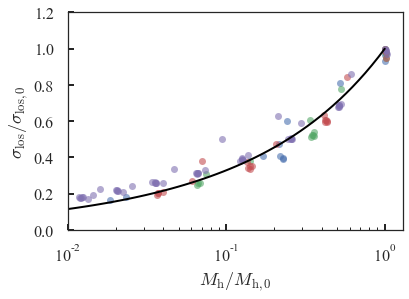

In [19]:
# plot_slos_Minit()
plot_slos_Minit(slos_fld='sig_proj_flat')

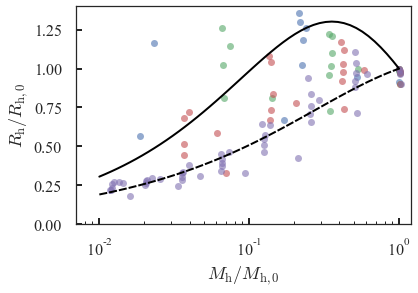

In [20]:
plot_rh_Minit()

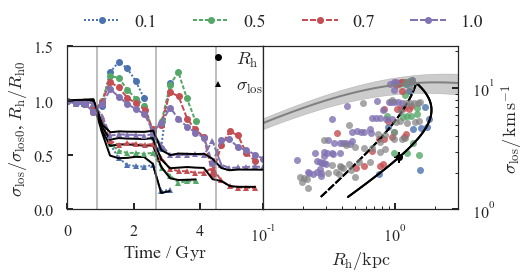

In [21]:
plot_lines = [plt.plot([0.],[0.],'.',color='k'),plt.plot([0.],[0.],'^',color='k',ms=6)]
plt.clf()
fig,ax = plt.subplots(1,2,figsize=[7.,3.])
plt.sca(ax[0])
for i,s in enumerate([0.1,0.5,0.7,1.0]):
    data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_SP_10_slope_%02d_PM_10_ca_10_properties.csv'%int(s*10.))
    data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
    
    fltr = np.argwhere(data.m_half<1e-3)
    if len(fltr)>0:
        data = data[data.index<fltr[0][0]]

    l,=plt.plot(data['times'],data['r_half']/data['r_half'][0],'.-',color=sns.color_palette()[i],label='%0.1f'%s)
    l.set_dashes((i+1,1))
    l,=plt.plot(data['times'],data['sig_proj_flat']/data['sig_proj_flat'][0],'^-',color=sns.color_palette()[i],ms=6,label='')
    l.set_dashes((i+1,1))
    plt.plot(data['times'],penarrubia_tracks_Mh_adjusted(data['m_half']/data['m_half'][0])[0],color='k',label='')
legend1 = plt.legend([l[0] for l in plot_lines], [r"$R_\mathrm{h}$",r"$\sigma_\mathrm{los}$"], 
                     loc='lower right', handletextpad=0., bbox_to_anchor=(1.08,0.6))
ll = plt.legend(ncol=4,bbox_to_anchor=(0.,1.),loc='lower left')
plt.gca().add_artist(legend1)

plt.ylim(0.,1.5)
plt.xlim(0.,5.9)
eq = crater2_eq()
solar_reflex = crater2_solarreflex()
pm = np.array([0.1,0.])+solar_reflex
Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])
R,T = integrate_orbits_backwards(Eq)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los0}$, $R_\mathrm{h}/R_\mathrm{h0}$')
plt.xlabel(r'Time / $\mathrm{Gyr}$')

plt.sca(ax[1])
plot_slos_rh('sig_proj_flat')
data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_1_PM_10_ca_10_properties.csv')
plt.plot(data['r_half'],data['sig_proj_flat'],'.',c='gray',alpha=0.7)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0.)
plt.savefig('core_cusp.pdf',bbox_inches='tight')

In [158]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties
def load_profiles(sl=0.1,s=1.,pmmag=0.1,ca=1.,ttype='st'):
    fldr = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/'
    fl='2comp_SP_%02d_slope_%02d_PM_%i_ca_%02d'%(int(s*10.),int(sl*10.),int(pmmag*100.),int(ca*10.))
    print fldr,fl
    import glob
    fls = glob.glob(fldr+fl+'_flattening_profile_%s*'%ttype)
    times_list = [float(s.split('_')[-1][:-4]) for s in fls]
    fls = np.array(fls)[np.argsort(np.array(times_list))]
    times = np.sort(times_list)
    return times, fls
def load_summary(sl=0.1,s=1.,pmmag=0.1,ca=1.):
    fldr = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/'
    fl='2comp_SP_%02d_slope_%02d_PM_%i_ca_%02d_properties.csv'%(int(s*10.),int(sl*10.),int(pmmag*100.),int(ca*10.))
    return pd.read_csv(fldr+fl)

def plot_density_profiles(sl=0.1,s=1.,pmmag=0.1,ca=1.):
    dd0,ddm0=0.,0.
    times,fls = load_profiles(sl=sl,s=s,pmmag=pmmag,ca=ca,ttype='st')
    times,fls_dm = load_profiles(sl=sl,s=s,pmmag=pmmag,ca=ca,ttype='dm')
    CS = plt.imshow(np.random.random((10,10))*times[-1],vmin=0.,vmax=times[-1],cmap=plt.cm.viridis)
    plt.clf()
#     Rs = rs()
    f,a=plt.subplots(1,2,figsize=[7.,3.])
    for T, F, FDM in zip(times, fls, fls_dm):
        dd = pd.read_csv(F)
        if dd0==0.:
            dd0=dd['dens_st'][0]
        ddm = pd.read_csv(FDM)
        if ddm0==0.:
            ddm0=ddm['dens_dm'][0]
        a[0].plot(dd['radii_st'],dd['dens_st']/dd0,c=plt.cm.viridis(T/times[-1]),alpha=0.4,lw=3)
#         a[0].plot(dd['radii_st']/Rs,dd['dens_st'][0]/(1.+(dd['radii_st']/Rs*s)**2)**2,
#                   c='k',alpha=0.4,lw=3)
        a[1].plot(ddm['radii_dm'],ddm['dens_dm']/ddm0,c=plt.cm.viridis(T/times[-1]),alpha=0.4,lw=3)
#         a[2].plot(dd['radii_st']/Rs,dd['align_st'],c=plt.cm.viridis(T/times[-1]),alpha=0.2,lw=3)
    lbl=[r'$\rho_\star$',r'$\rho_\mathrm{DM}$']
    for i in range(2):
        plt.sca(a[i])
        plt.semilogx()
        plt.semilogy()
        plt.xlim(0.1,10.)
        plt.ylim(1e-6,1.)
        plt.xlabel(r'$r/r_{s\mathrm{DM}}$')
        plt.annotate(lbl[i],xy=(0.1,0.1),xycoords='axes fraction',fontsize=16)
        if i>0:
            plt.gca().set_yticklabels([])
            plt.gca().xaxis.get_major_ticks()[1].set_visible(False)

    plt.subplots_adjust(wspace=0., right=0.9)
    cbar_ax = f.add_axes([0.84, 0., 0.1, 1.])
    cbar_ax.axis('off')
    f.colorbar(CS, ax=cbar_ax,label=r'Time / $\mathrm{Gyr}$')
#     plt.tight_layout()

def plot_shapes_mass():
    slist=[0.1,0.5,0.7,1.0]
    f,a=plt.subplots(1,3,figsize=[7.,3.])
    for cc,s in enumerate(slist):
        times,fls = load_profiles(sl=s,s=1.,pmmag=0.1,ca=1.,ttype='st')
        data = load_summary(sl=s,s=1.,pmmag=0.1,ca=1.)
        mrange=np.zeros(len(fls))
        cashape = np.zeros(len(fls))
        bashape = np.zeros(len(fls))
        epsrange = np.zeros(len(fls))
        srange = np.zeros(len(fls))
        for II, F in enumerate(fls):
            dd = pd.read_csv(F)
            mrange[II] = data['mass_dm_core_init'][II]/data['mass_dm_core_init'][0]
            epsrange[II] = data['eps'][II]
            bashape[II] = np.mean(dd['ba_st'][dd['radii_st']<.5*data['r_half'][0]])
            cashape[II] = np.mean(dd['ca_st'][dd['radii_st']<.5*data['r_half'][0]])
            srange[II] = data['s'][II]
        mkr = '.'
        ms=15
        lbl=None
        fltr = srange>20.
        a[0].plot(mrange[fltr],bashape[fltr],mkr,ms=ms,
                  color=sns.color_palette()[cc],zorder=4-cc, alpha=0.8)
        a[1].plot(mrange[fltr],cashape[fltr],mkr,ms=ms,
                  color=sns.color_palette()[cc],label=lbl,zorder=4-cc, alpha=0.8)
        a[2].plot(mrange[fltr],1.-epsrange[fltr],mkr,ms=ms,
                  color=sns.color_palette()[cc],zorder=4-cc, alpha=0.8)

    plt.subplots_adjust(wspace=0., right=0.9)
    lbl=[r'$b/a$',r'$c/a$',r'$1-\epsilon$']
    for i in range(3):
        plt.sca(a[i])
        plt.semilogx()
        plt.xlim(1e-2,1.)
        plt.ylim(0.2,1.)
        plt.xlabel(r'$M_\mathrm{h}/M_\mathrm{h0}$')
        plt.annotate(lbl[i],xy=(0.1,0.1),xycoords='axes fraction',fontsize=16)
        if i>0:
            plt.gca().set_yticklabels([])
            plt.gca().xaxis.get_major_ticks()[1].set_visible(False)
    plt.axhline(0.9,color='k',alpha=0.7,zorder=6)
    plt.sca(a[1])
    plt.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,1.0))

In [164]:
def roche_function(eps):
    return ((1.-eps**2)/2./eps**3)*((3-eps*eps)*np.arctanh(eps)-3*eps)

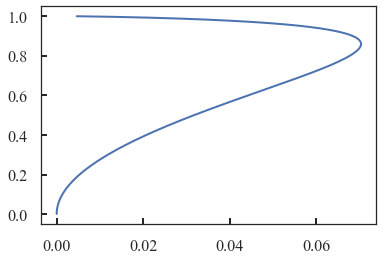

In [172]:
ee = np.linspace(0.,1.,1000)
plt.plot(roche_function(ee),ee)

/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_01_PM_10_ca_10
/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_05_PM_10_ca_10
/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_07_PM_10_ca_10
/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_10_PM_10_ca_10


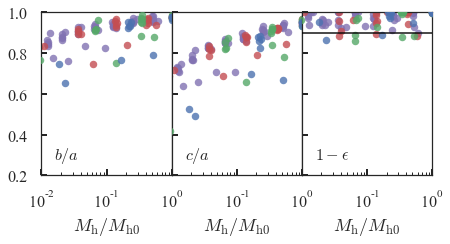

In [159]:
plot_shapes_mass()

/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_10_PM_10_ca_10
/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_10_PM_10_ca_10


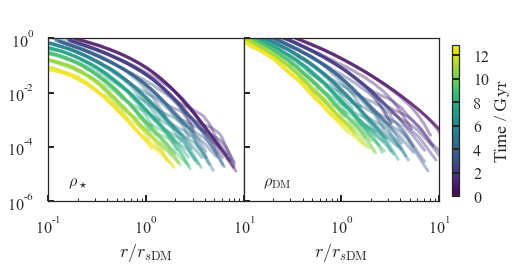

In [116]:
plot_density_profiles(sl=1.)

/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_07_PM_10_ca_10
/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_07_PM_10_ca_10


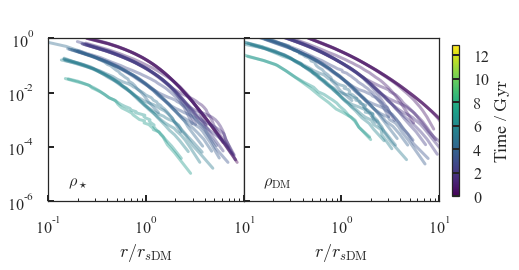

In [118]:
plot_density_profiles(sl=0.7)

/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_01_PM_10_ca_10
/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_SP_10_slope_01_PM_10_ca_10


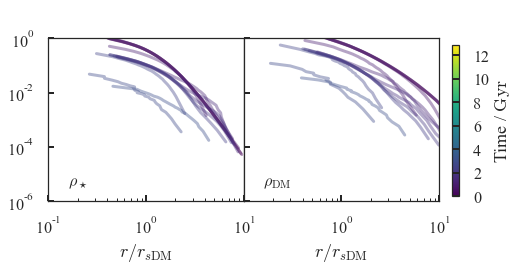

In [119]:
plot_density_profiles(sl=0.1)